In [194]:
import requests as rq
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

In [169]:
chrome_options = Options()
chrome_options.add_argument("--headless")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

url = "https://www.formula1.com/en/racing/2024"
driver.get(url)

html = driver.page_source
soup = bs(html, 'html.parser')
divs = soup.find_all('div', attrs={'class': 'f1-container'})

In [171]:
for div in divs:
    if div.find('fieldset') and 'Netherlands' in div.text:
        netherlands_event = div

In [176]:
paragraphs = netherlands_event.find_all('p', class_='f1-text')

In [184]:
event_date = []
for p in paragraphs:
    if 'font-normal' in p.get('class', []) and 'uppercase' in p.get('class', []):
        event_date.append(p.get_text())

In [193]:
event_date

['Fri',
 '12:30 - 13:30',
 'Fri',
 '16:00 - 17:00',
 'Sat',
 '11:30 - 12:30',
 'Sat',
 '15:00 - 16:00',
 'Sun',
 '15:00']

In [185]:
titles = netherlands_event.find_all('p', class_='f1-heading')

In [191]:
event_title = []
for p in titles:
    if 'uppercase' in p.get('class', []):
        event_title.append(p.get_text())

In [192]:
event_title

['Practice 1', 'Practice 2', 'Practice 3', 'Qualifying', 'Race']

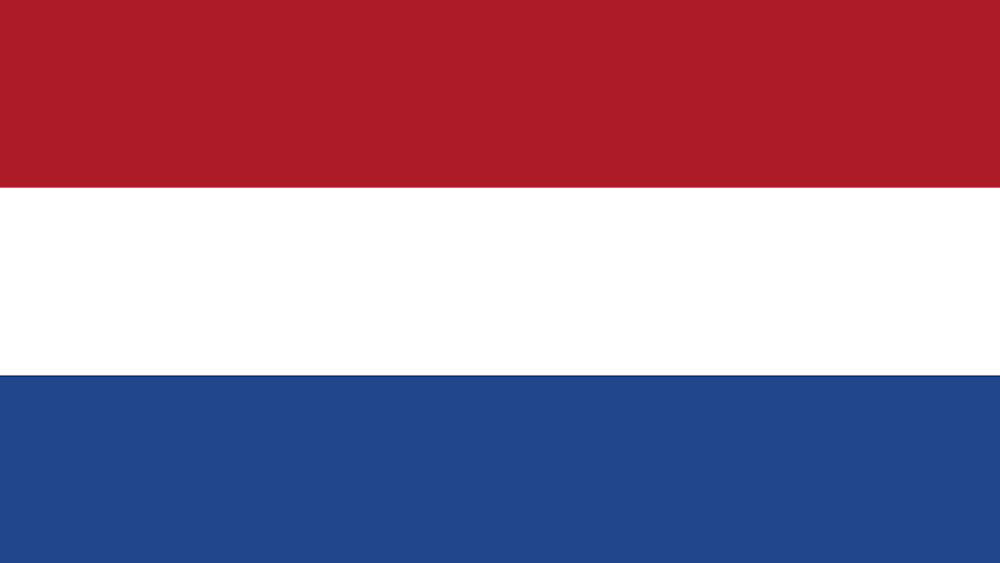

In [195]:
from io import BytesIO
from PIL import Image
from IPython.display import display

img_tag = netherlands_event.find('img', alt='Netherlands')
img_url = img_tag['src']
response = rq.get(img_url)
img = Image.open(BytesIO(response.content))
display(img)